In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
SP500 = pd.read_csv('SP500.csv')
NASDAQ100 = pd.read_csv('NASDAQ100.csv')

In [3]:
SP500

,DATE,SP500
0,2012-11-01,1394.512381
1,2012-12-01,1422.285500
2,2013-01-01,1480.395238
3,2013-02-01,1512.311579
4,2013-03-01,1550.829000
...,...,...
114,2022-05-01,4040.360000
115,2022-06-01,3898.946667
116,2022-07-01,3911.729500
117,2022-08-01,4158.563043


In [4]:
NASDAQ100

,DATE,NASDAQ100
0,2012-11-01,2616.617619
1,2012-12-01,2658.754500
2,2013-01-01,2736.900952
3,2013-02-01,2748.191579
4,2013-03-01,2795.325500
...,...,...
114,2022-05-01,12375.008571
115,2022-06-01,11918.650000
116,2022-07-01,12140.191500
117,2022-08-01,13090.348261


In [5]:
X = SP500['SP500']
Y = NASDAQ100['NASDAQ100']

In [6]:
X = X.to_numpy().reshape(-1, 1)
Y = Y.to_numpy().reshape(-1, 1)

In [7]:
X_return = (X - np.roll(X, 1)) / np.roll(X, 1)
X_return = np.delete(X_return, 0)
X_return.reshape(-1, 1)
Y_return = (Y - np.roll(Y, 1)) / np.roll(Y, 1)
Y_return = np.delete(Y_return, 0)
Y_return.reshape(-1, 1)

array([[ 0.01610357],
       [ 0.02939213],
       [ 0.00412533],
       [ 0.01715089],
       [ 0.00831305],
       [ 0.05769768],
       [-0.01471938],
       [ 0.03259042],
       [ 0.02388067],
       [ 0.02642568],
       [ 0.03275961],
       [ 0.03265366],
       [ 0.03362752],
       [ 0.01255892],
       [ 0.01603686],
       [ 0.01277033],
       [-0.02913375],
       [ 0.01875342],
       [ 0.04722299],
       [ 0.03550248],
       [ 0.01341216],
       [ 0.02284071],
       [-0.02595827],
       [ 0.06468539],
       [ 0.00940016],
       [-0.01833659],
       [ 0.03843569],
       [ 0.0105339 ],
       [ 0.00677772],
       [ 0.0130077 ],
       [ 0.00118326],
       [ 0.01040427],
       [-0.02340459],
       [-0.03634285],
       [ 0.04314827],
       [ 0.04672858],
       [-0.00541718],
       [-0.07966463],
       [-0.03046462],
       [ 0.05994477],
       [ 0.02618917],
       [-0.02500535],
       [ 0.01085793],
       [ 0.0374012 ],
       [ 0.042058  ],
       [ 0

In [8]:
n = len(X_return)
X_mean = sum(X_return) / n
Y_mean = sum(Y_return) / n

In [9]:
cov_X_Y = sum((X_return - X_mean)*(Y_return - Y_mean)) / (n - 1)
cov_X_Y

0.0012187606630784293

In [10]:
Y_variance = sum((Y_return - Y_mean) ** 2) / (n - 1)
Y_variance

0.00160753170635514

In [11]:
Y_std = np.sqrt(Y_variance)
Y_std

0.04009403579530427

In [12]:
X_variance = sum((X_return - X_mean) ** 2) / (n - 1)
X_std = np.sqrt(X_variance)
X_std

0.03324945017389048

In [13]:
correlation_X_Y = cov_X_Y / (X_std * Y_std)
correlation_X_Y

0.9142273018413691

In [14]:
CV_X = X_std / X_mean #coefficient of variation
CV_X

3.6071699891346896

In [15]:
CV_Y = Y_std / Y_mean 
CV_Y

2.928958991235529

In [16]:
SE_X = X_std / np.sqrt(n) #standar error
SE_X

0.0030608599889158567

In [17]:
SE_Y = Y_std / np.sqrt(n)
SE_Y

0.0036909551682263926

In [18]:
X_and_constant = sm.add_constant(X_return)
results = sm.OLS(Y_return,X_and_constant).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     590.5
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.49e-47
Time:                        19:45:31   Log-Likelihood:                 319.22
No. Observations:                 118   AIC:                            -634.4
Df Residuals:                     116   BIC:                            -628.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.002      2.262      0.026       0.000       0.007
x1             1.1024      0.045     24.300      0.000       1.013       1.192
==============================================================================
Omnibus:                        3.828   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.514
Skew:                          -0.259   Prob(JB):                        0.173
Kurtosis:                       3.668   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

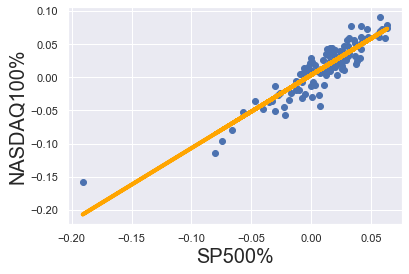

In [19]:
plt.scatter(X_return,Y_return)
yhat = 1.1024*X_return + 0.0035
fig = plt.plot(X_return,yhat, lw=4, c='orange', label = 'regression line' )
plt.xlabel('SP500%',fontsize=20)
plt.ylabel('NASDAQ100%',fontsize=20)
plt.show()

In [20]:
month = NASDAQ100['DATE']
month = month.drop(index=0)
month

1      2012-12-01
2      2013-01-01
3      2013-02-01
4      2013-03-01
5      2013-04-01
          ...    
114    2022-05-01
115    2022-06-01
116    2022-07-01
117    2022-08-01
118    2022-09-01
Name: DATE, Length: 118, dtype: object

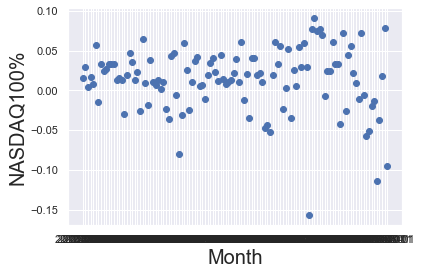

In [21]:
plt.scatter(month,Y_return)
plt.xlabel('Month',fontsize=20)
plt.ylabel('NASDAQ100%',fontsize=20)
plt.show()

In [22]:
yhat = yhat.reshape(-1, 1)

In [23]:
investment = 100000
investment_profit_S = (investment * np.sum(X_return))  
investment_profit_N = (investment * np.sum(Y_return)) 

In [24]:
investment_profit_S

108767.68026838276

In [25]:
investment_profit_N

161528.25075403924

In [26]:
n = len(yhat)
portfolio = investment
i = 0
j = 0
yhat_squared = yhat**2
Y_return_squared = Y_return ** 2
while i < n :
    if yhat_squared[i] == Y_return_squared[i] :
        j+=1
    i+=1
j

0

In [27]:
#there is no y = y_hat

In [28]:
i = 0
while i < n - 1 :
    if yhat_squared[i] < Y_return_squared[i] :
        n_of_S = portfolio / X[i+1]
        n_of_N = 0
    else :
        n_of_N = portfolio / Y[i]
        n_of_S = 0
    portfolio = (n_of_S * X[i+2]) + (n_of_N * Y[i+2])
    i+=1
arbitrage_profit = portfolio - investment     

In [29]:
#n-1 because X and Y have one row more than yhat

In [30]:
arbitrage_profit

array([349071.17654239])

In [31]:
# investment = 100000
# portfolio = investment
# i = 0
# while i < n  :
#     if yhat_squared[i] < Y_return_squared[i] :
#         portfolio = portfolio + (portfolio * X_return[i])
#     elif yhat_squared[i] > Y_return_squared[i] :
#         portfolio = portfolio + (portfolio  * Y_return[i])
#     i+=1 
# portfolio
#269653.79231794516

In [32]:
list_of_tuples = list(zip(month, yhat, Y_return, X_return))
df = pd.DataFrame(list_of_tuples,
                  columns=['Month', 'Reg_y^', 'NASDAQ100%', 'SP500%'])

In [33]:
df

,Month,Reg_y^,NASDAQ100%,SP500%
0,2012-12-01,[0.0254554066756907],0.016104,0.019916
1,2013-01-01,[0.048540306799296246],0.029392,0.040857
2,2013-02-01,[0.027267013868984755],0.004125,0.021559
3,2013-03-01,[0.031577286162138674],0.017151,0.025469
4,2013-04-01,[0.017626828847374973],0.008313,0.012815
...,...,...,...,...
113,2022-05-01,[-0.0845996968548693],-0.113838,-0.079916
114,2022-06-01,[-0.035084200087781105],-0.036877,-0.035000
115,2022-07-01,[0.007114257047202584],0.018588,0.003279
116,2022-08-01,[0.07306240157465761],0.078265,0.063101


In [34]:
df.to_csv('SP_NASDAQ_arbitrage.csv')

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_return, Y_return, test_size =0.2, random_state=42)

In [36]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

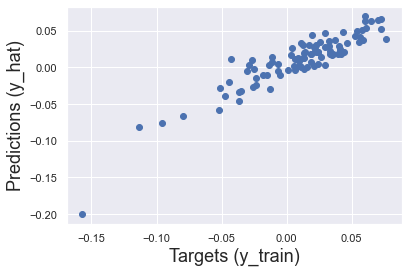

In [37]:
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

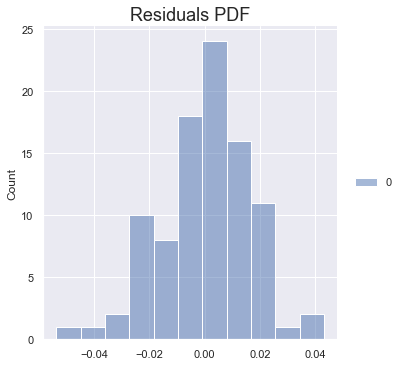

In [38]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [39]:
reg.score(x_train,y_train)

0.8350973378023641

In [40]:
reg.intercept_

array([0.00365004])

In [41]:
reg.coef_

array([[1.06983249]])

In [42]:
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_hat_test = reg.predict(x_test)

In [43]:
reg.score(x_test,y_test)

0.8056375990512814

In [44]:
investment = 100000
test_portfolio = investment
k = len(x_test)
n_of_S = 0
n_of_N = 0
i = 0
y_hat_test_squared = y_hat_test ** 2
y_test_return_squared = y_test ** 2
while i < k - 1 :
    if y_hat_test_squared[i] < y_test_return_squared[i] :
        j = np.where(X_return == x_test[i])
        n_of_S = test_portfolio / X[j]      
        n_of_N = 0
    else :
        z = np.where(Y_return == y_test[i])
        n_of_N = test_portfolio / Y[z]
        n_of_S = 0
    j = np.where(X_return == x_test[i+1])
    z = np.where(Y_return == y_test[i+1])
    test_portfolio = (n_of_S * X[j]) + (n_of_N * Y[z])
    i+=1
arbitrage_test_profit = test_portfolio - investment

In [45]:
arbitrage_test_profit

array([[106513.08093862]])

In [46]:
investment_test_profit_S = (investment * np.sum(x_test))  
investment_test_profit_N = (investment * np.sum(y_test)) 

In [47]:
investment_test_profit_S

49795.893302103155

In [48]:
investment_test_profit_N

64127.90184764296

In [49]:
# Proof that with linear regression we can outperform the stock market average

In [50]:
#are there any instances of yhat = y

In [51]:
test_residuals = y_test - y_hat_test
test_residuals

array([[ 0.00545009],
       [ 0.02667408],
       [-0.00904648],
       [ 0.0118421 ],
       [ 0.00629237],
       [ 0.00710798],
       [-0.00995368],
       [ 0.00827755],
       [ 0.00355433],
       [-0.00160255],
       [ 0.01112275],
       [-0.01209171],
       [-0.01050151],
       [ 0.01352142],
       [-0.00229135],
       [ 0.00937366],
       [ 0.02892428],
       [-0.00885327],
       [ 0.00160066],
       [-0.03807156],
       [-0.01896488],
       [-0.0058111 ],
       [-0.01957977],
       [ 0.02397192]])